# Three Years Worth of Commute Data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [79]:
df = pd.read_csv('Data.csv', delimiter=';')
df = df.drop(['route', 'duration', 'hour'], axis='columns')

df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
df.date = pd.to_datetime(df.date)

df['duration'] = df.end - df.start
df['duration_min'] = df.duration.astype('timedelta64[s]')/60
df['hour'] = df.start.dt.hour
df['start_hours'] = (df.start.dt.hour * 60 + df.start.dt.minute)/60
df['end_hours'] = (df.end.dt.hour * 60 + df.end.dt.minute)/60

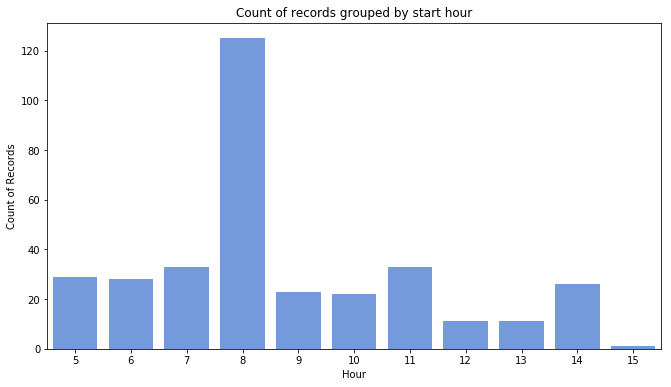

In [53]:
fig = plt.figure(figsize=(11, 6))
ax = plt.gca()
plt.title('Count of records grouped by start hour')
sns.countplot(x='hour', data=df, ax=ax, color='cornflowerblue')
plt.xlabel('Hour')
plt.ylabel('Count of Records')
plt.show()

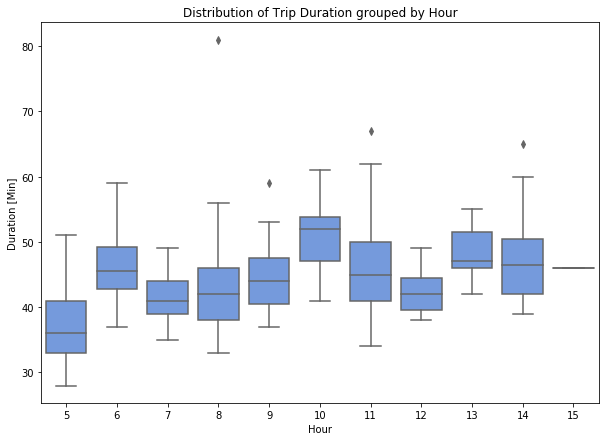

In [54]:
fig = plt.figure(figsize=(10, 7))
ax = plt.gca()
plt.title('Distribution of Trip Duration grouped by Hour')
sns.boxplot(x='hour', y='duration_min', data=df, ax=ax, color='cornflowerblue')
plt.xlabel('Hour')
plt.ylabel('Duration [Min]')
plt.show()

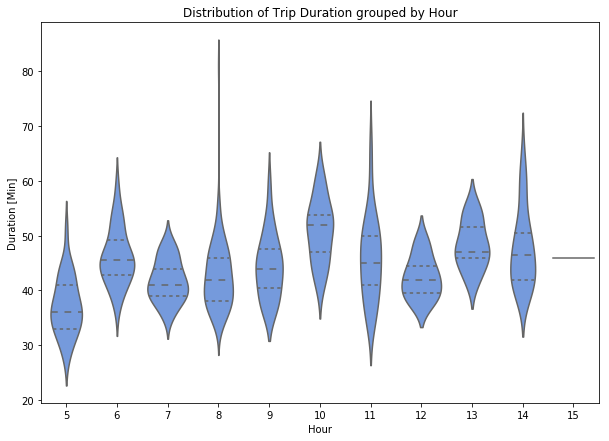

In [55]:
fig = plt.figure(figsize=(10, 7))
ax = plt.gca()
plt.title('Distribution of Trip Duration grouped by Hour')
sns.violinplot(x='hour', y='duration_min', data=df, ax=ax, color='cornflowerblue', inner='quartile')
plt.xlabel('Hour')
plt.ylabel('Duration [Min]')
plt.show()

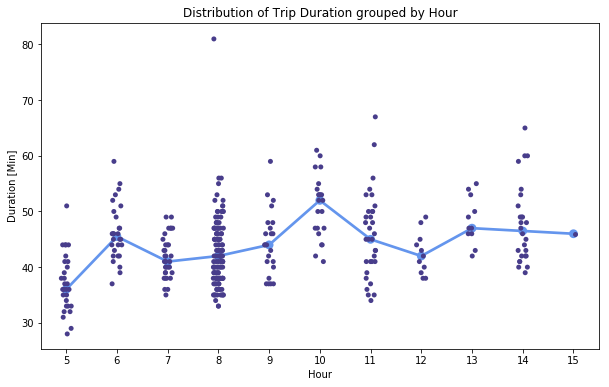

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.title('Distribution of Trip Duration grouped by Hour')
sns.stripplot(x='hour', y='duration_min', data=df, ax=ax, color='darkslateblue')
sns.pointplot(x='hour', y='duration_min', data=df, ax=ax, color='cornflowerblue', ci=0, estimator=np.median)
plt.xlabel('Hour')
plt.ylabel('Duration [Min]')
plt.show()

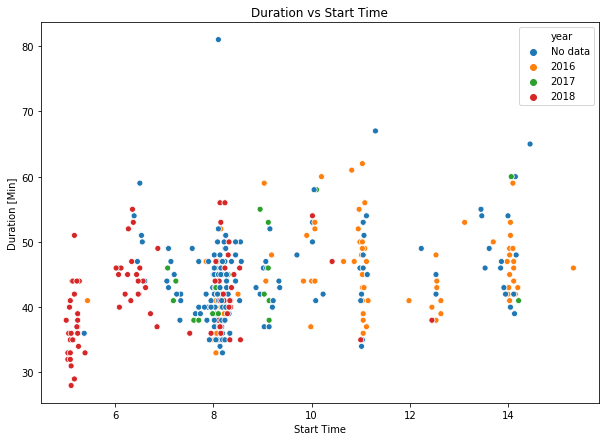

In [76]:
def str_year(x):
    if np.isnan(x): return 'No data'
    return str(int(x))
df['year'] = df.date.dt.year.apply(str_year)

fig = plt.figure(figsize=(10, 7))
ax = plt.gca()
plt.title('Duration vs Start Time')
sns.scatterplot(x='start_hours', y='duration_min', hue='year', data=df)
plt.xlabel('Start Time')
plt.ylabel('Duration [Min]')
plt.show()

Text(0.5,0,'Year')

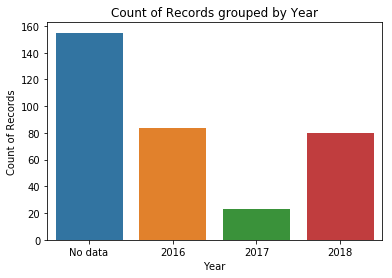

In [78]:
sns.countplot(x='year', data=df)
plt.title('Count of Records grouped by Year')
plt.ylabel('Count of Records')
plt.xlabel('Year')

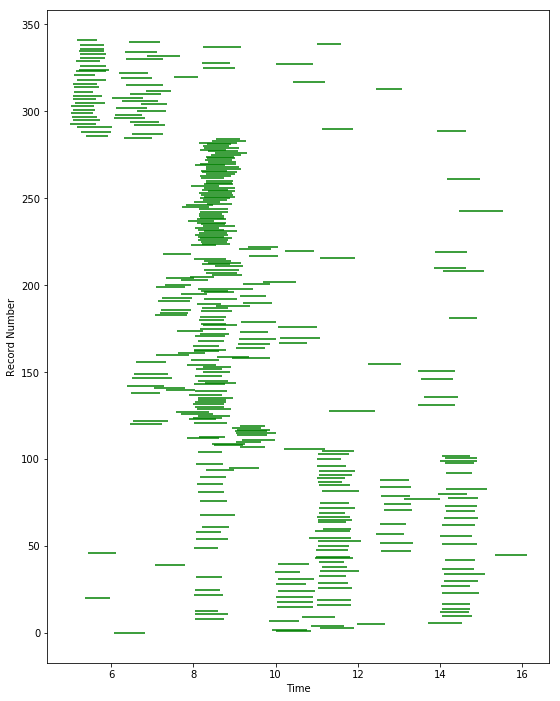

In [87]:
plt.figure(figsize=(9, 12))
for i, row in df.iterrows():
    plt.hlines(i, row['start_hours'], row['end_hours'], color='green')
plt.xlabel('Time')
plt.ylabel('Record Number')
plt.show()